In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.impute import SimpleImputer

In [13]:
dataf = pd.read_csv('metal_merged_cuboid (1).csv')
dataf

rho           E       nu  a  b  c        f1        f2  \
0        6110.000000  128.000000  0.37000  1  2  8  0.673035  0.728011   
1        7310.000000   50.000000  0.36000  1  2  8  0.920299  0.929082   
2        6511.000000   67.000000  0.34000  1  2  8  0.855240  0.870606   
3        7010.000000   41.000000  0.28000  1  2  8  0.936469  0.954165   
4        8570.000000  105.000000  0.40000  1  2  8  0.841755  0.853253   
...              ...         ...      ... .. .. ..       ...       ...   
293682  17062.588420  186.745656  0.28101  4  6  7  0.977860  0.979278   
293683   5340.442084   33.253319  0.34854  4  6  7  0.992497  0.992632   
293684  10183.233930   53.112658  0.26944  4  6  7  0.991820  0.992300   
293685   9181.825681  102.209640  0.27635  4  6  7  0.977194  0.977220   
293686  10250.577320  173.191202  0.32317  4  6  7  0.962830  0.963215   

              f3        f4  ...       f21       f22       f23       f24  \
0       0.741976  0.769326  ...  1.087171  1.108797  1.118980  1.147124   
1       0.930513  0.931765  ...  1.050433  1.051583  1.054046  1.054303   
2       0.880019  0.880077  ...  1.048381  1.055423  1.063596  1.063681   
3       0.954842  0.968828  ...  1.023546  1.023736  1.029884  1.036943   
4       0.876858  0.880704  ...  1.062618  1.062693  1.067246  1.095626   
...          ...       ...  ...       ...       ...       ...       ...   
293682  0.979523  0.979627  ...  1.010155  1.010504  1.011443  1.014072   
293683  0.992896  0.993924  ...  1.003336  1.004670  1.004833  1.005249   
293684  0.992894  0.993118  ...  1.002629  1.002801  1.003355  1.003696   
293685  0.979613  0.980165  ...  1.006481  1.007765  1.008176  1.012310   
293686  0.963512  0.965959  ...  1.010482  1.012294  1.016220  1.016688   

             f25       f26       f27       f28       f29       f30  
0       1.148189  1.175179  1.183941  1.195690  1.209729  1.232676  
1       1.056372  1.060492  1.068504  1.071042  1.074012  1.074721  
2       1.078316  1.098101  1.098671  1.105719  1.128428  1.131313  
3       1.037585  1.050004  1.051020  1.056617  1.058855  1.066637  
4       1.109565  1.110328  1.110342  1.124554  1.136007  1.140405  
...          ...       ...       ...       ...       ...       ...  
293682  1.014278  1.015275  1.016253  1.016722  1.018660  1.020192  
293683  1.006102  1.006469  1.006631  1.007005  1.007292  1.007401  
293684  1.005199  1.005365  1.005713  1.005767  1.006547  1.007411  
293685  1.013547  1.016362  1.019045  1.019056  1.020931  1.021633  
293686  1.018899  1.019469  1.023167  1.024179  1.029690  1.031406  

[293687 rows x 36 columns]

In [14]:
X = dataf[['rho','a','b', 'c',  'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20']]
# dataf['E']=dataf['E']*10
# dataf['mu']= dataf['mu']*10000

Y = dataf[['E', 'nu']]

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
Y_imputed = imputer.fit_transform(Y)

# Standardize the input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.001, random_state=42)

In [ ]:
model = Sequential()
model.add(Dense(512, input_dim=X_scaled.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2))  # Output layer with 2 neurons for E and mu
from keras.optimizers import Adam

# Create an instance of the Adam optimizer with a specified learning rate
adam_optimizer = Adam(learning_rate=0.0003)
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_split=0.1)

C:\Users\Ayush Rai\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
16504/16504 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - loss: 600.1238 - val_loss: 103.6242
Epoch 2/1000
16504/16504 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 89.8684 - val_loss: 299.8069
Epoch 3/1000
16504/16504 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 78.0796 - val_loss: 57.9004
Epoch 4/1000
16504/16504 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - loss: 70.6655 - val_loss: 63.9202
Epoch 5/1000
16504/16504 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - loss: 63.2877 - val_loss: 72.8563
Epoch 6/1000
16504/16504 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - loss: 63.9187 - val_loss: 56.1992
Epoch 7/1000
16504/16504 ━━━━━━━━━━━━━━━━━━━━ 71s 2ms/step - loss: 59.9242 - val_loss: 64.1663
Epoch 8/1000
16504/16504 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - loss: 56.0114 - val_loss: 44.7056
Epoch 9/1000
16504/16504 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - loss: 57.0256 - val_loss: 52.1366
Epoch 10/1000
16504/16504 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - loss: 50.5881 - val_loss: 46.9496
Epoch 11/1000
16504/16504 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Predictions on the test set
from scipy import stats

y_pred  = model.predict(X_test)
# Calculate Mean Squared Error
mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

# Display the results
results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
# results_df['Actual_E'] /= 10
# results_df['Predicted_E'] /= 10
# results_df['Error_E'] /= 10
# results_df['Actual_mu'] /= 10000
# results_df['Predicted_mu'] /= 10000
# results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()

import numpy as np

# Calculate median percentage error for E and mu
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
    # Calculate mode percentage error for E
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu'])

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
print(results_df)


In [ ]:
import matplotlib.pyplot as plt

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101,5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for mu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for mu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 5))  # Set custom x-ticks
plt.show()

# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')

In [ ]:
import pickle

In [ ]:
model_file_pickle = "metals_ANN_model_no_scale_cuboid.pkl"
with open(model_file_pickle, 'wb') as file:
    pickle.dump(model, file)

In [ ]:
model_file_pickle = "metals_ANN_model_no_scale_cuboid.pkl"
with open(model_file_pickle, 'rb') as file:
    model1 = pickle.load(file)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y_imputed, test_size=0.01, random_state=42)
y_pred_loaded_pickle = model1.predict(X_test)

In [ ]:
y_pred_loaded_pickle

In [11]:
# Predictions on the test set
from scipy import stats

y_pred  = model1.predict(X_test)
# Calculate Mean Squared Error
mse_column1 = mean_squared_error(y_test[:, 0], y_pred[:, 0])
mse_column2 = mean_squared_error(y_test[:, 1], y_pred[:, 1])

print(f'Mean Squared Error for E: {mse_column1}')
print(f'Mean Squared Error for mu: {mse_column2}')

# Display the results
results_df = pd.DataFrame({
    'Actual_E': y_test[:, 0],
    'Predicted_E': y_pred[:, 0],
    'Error_E': abs(y_test[:, 0] - y_pred[:, 0]),
    'Actual_mu': y_test[:, 1],
    'Predicted_mu': y_pred[:, 1],
    'Error_mu': abs(y_test[:, 1] - y_pred[:, 1])
})
# results_df['Actual_E'] /= 10
# results_df['Predicted_E'] /= 10
# results_df['Error_E'] /= 10
# results_df['Actual_mu'] /= 10000
# results_df['Predicted_mu'] /= 10000
# results_df['Error_mu'] /= 10000

# Calculate mean absolute error for 'E' and 'mu'
mae_E = results_df['Error_E'].mean()
mae_mu = results_df['Error_mu'].mean()

# Calculate standard deviation for 'E' and 'mu'
std_E = results_df['Error_E'].std()
std_mu = results_df['Error_mu'].std()
results_df['Percentage_Error_E'] = (results_df['Error_E'] / results_df['Actual_E']) * 100
results_df['Percentage_Error_mu'] = (results_df['Error_mu'] / results_df['Actual_mu']) * 100
mape_E = results_df['Percentage_Error_E'].mean()
mape_mu = results_df['Percentage_Error_mu'].mean()

import numpy as np

# Calculate median percentage error for E and mu
median_percentage_error_E = np.median(results_df['Percentage_Error_E'])
median_percentage_error_mu = np.median(results_df['Percentage_Error_mu'])
    # Calculate mode percentage error for E
mode_percentage_error_E = stats.mode(results_df['Percentage_Error_E'])
mode_percentage_error_mu = stats.mode(results_df['Percentage_Error_mu'])

print(f'Median Percentage Error for E: {median_percentage_error_E}')
print(f'Median Percentage Error for mu: {median_percentage_error_mu}')

print(f'Mean Absolute Error for E: {mae_E}')
print(f'Mean Absolute Error for mu: {mae_mu}')
print(f'Standard Deviation for E: {std_E}')
print(f'Standard Deviation for mu: {std_mu}')
print(f'Mode Percentage Error for E: {mode_percentage_error_E} ')
print(f'Mode Percentage Error for E: {mode_percentage_error_mu} ')
print(f'Mean Absolute percentage Error for E: {mape_E}')
print(f'Mean Absolute percentage Error for mu: {mape_mu}')
print(results_df)


92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error for E: 31.406547459651062
Mean Squared Error for mu: 0.001292908372672099
Median Percentage Error for E: 2.245910105841622
Median Percentage Error for mu: 9.38289981710581
Mean Absolute Error for E: 3.408444967712999
Mean Absolute Error for mu: 0.030117440917583643
Standard Deviation for E: 4.449246059895093
Standard Deviation for mu: 0.01964636212913593
Mode Percentage Error for E: ModeResult(mode=8.226190660032827e-05, count=1) 
Mode Percentage Error for E: ModeResult(mode=17.99861649193962, count=2) 
Mean Absolute percentage Error for E: 4.015972751295911
Mean Absolute percentage Error for mu: 9.629623449620349
        Actual_E  Predicted_E    Error_E  Actual_mu  Predicted_mu  Error_mu  \
0      60.729114    59.728184   1.000930    0.28383      0.296983  0.013153   
1     211.231622   211.333145   0.101523    0.25127      0.280993  0.029723   
2      39.764759    37.513668   2.251091    0.33030      0.293218  0.037082   
3   

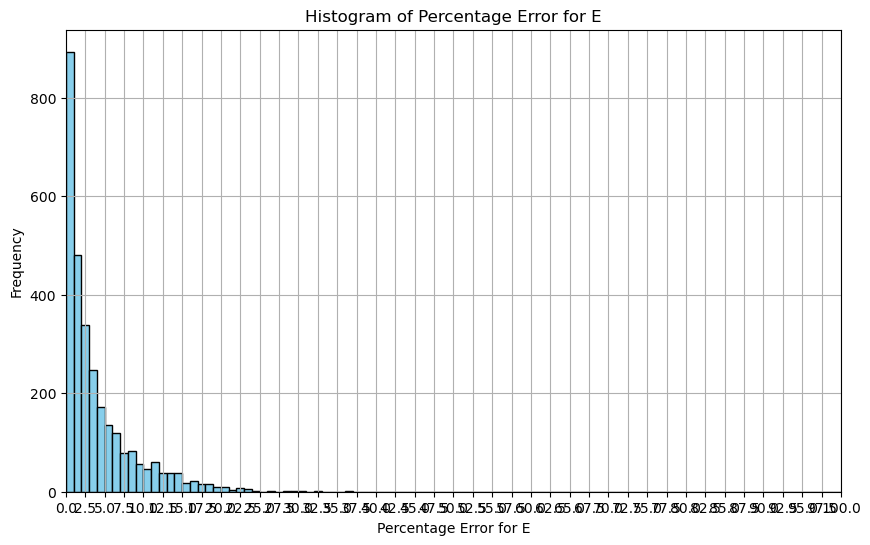

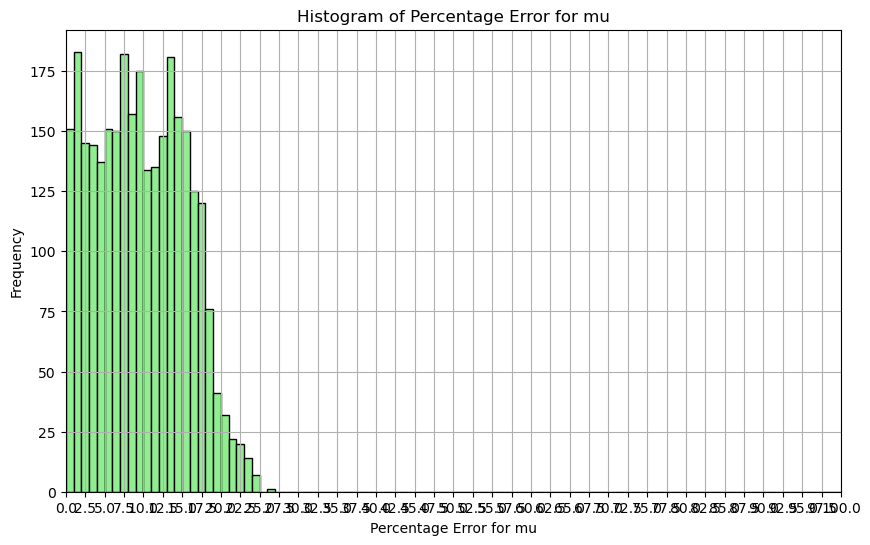

Maximum Percentage Error for E: 36.29984540727554
Minimum Percentage Error for E: 8.226190660032827e-05
Maximum Percentage Error for mu: 26.966510552076166
Minimum Percentage Error for mu: 0.013640189200904058


In [12]:
import matplotlib.pyplot as plt

import numpy as np

# Define custom bins for the histogram
custom_bins = np.arange(0, 101, 1)

# Plot histogram of percentage error for E
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_E'], bins=custom_bins, color='skyblue', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for E')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for E')
plt.grid(True)
plt.xticks(np.arange(0, 101, 2.5))  # Set custom x-ticks
plt.show()

# Plot histogram of percentage error for mu
plt.figure(figsize=(10, 6))
plt.hist(results_df['Percentage_Error_mu'], bins=custom_bins, color='lightgreen', edgecolor='black')
plt.xlim(0, 100)  # Set limit for x-axis
plt.xlabel('Percentage Error for mu')
plt.ylabel('Frequency')
plt.title('Histogram of Percentage Error for mu')
plt.grid(True)
plt.xticks(np.arange(0, 101, 2.5))  # Set custom x-ticks
plt.show()

# Display maximum and minimum errors for E and mu
max_error_E = results_df['Percentage_Error_E'].max()
min_error_E = results_df['Percentage_Error_E'].min()
max_error_mu = results_df['Percentage_Error_mu'].max()
min_error_mu = results_df['Percentage_Error_mu'].min()

print(f'Maximum Percentage Error for E: {max_error_E}')
print(f'Minimum Percentage Error for E: {min_error_E}')
print(f'Maximum Percentage Error for mu: {max_error_mu}')
print(f'Minimum Percentage Error for mu: {min_error_mu}')